In [9]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%config Completer.use_jedi = False
mpl.rcParams['hatch.linewidth'] = 0.5

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

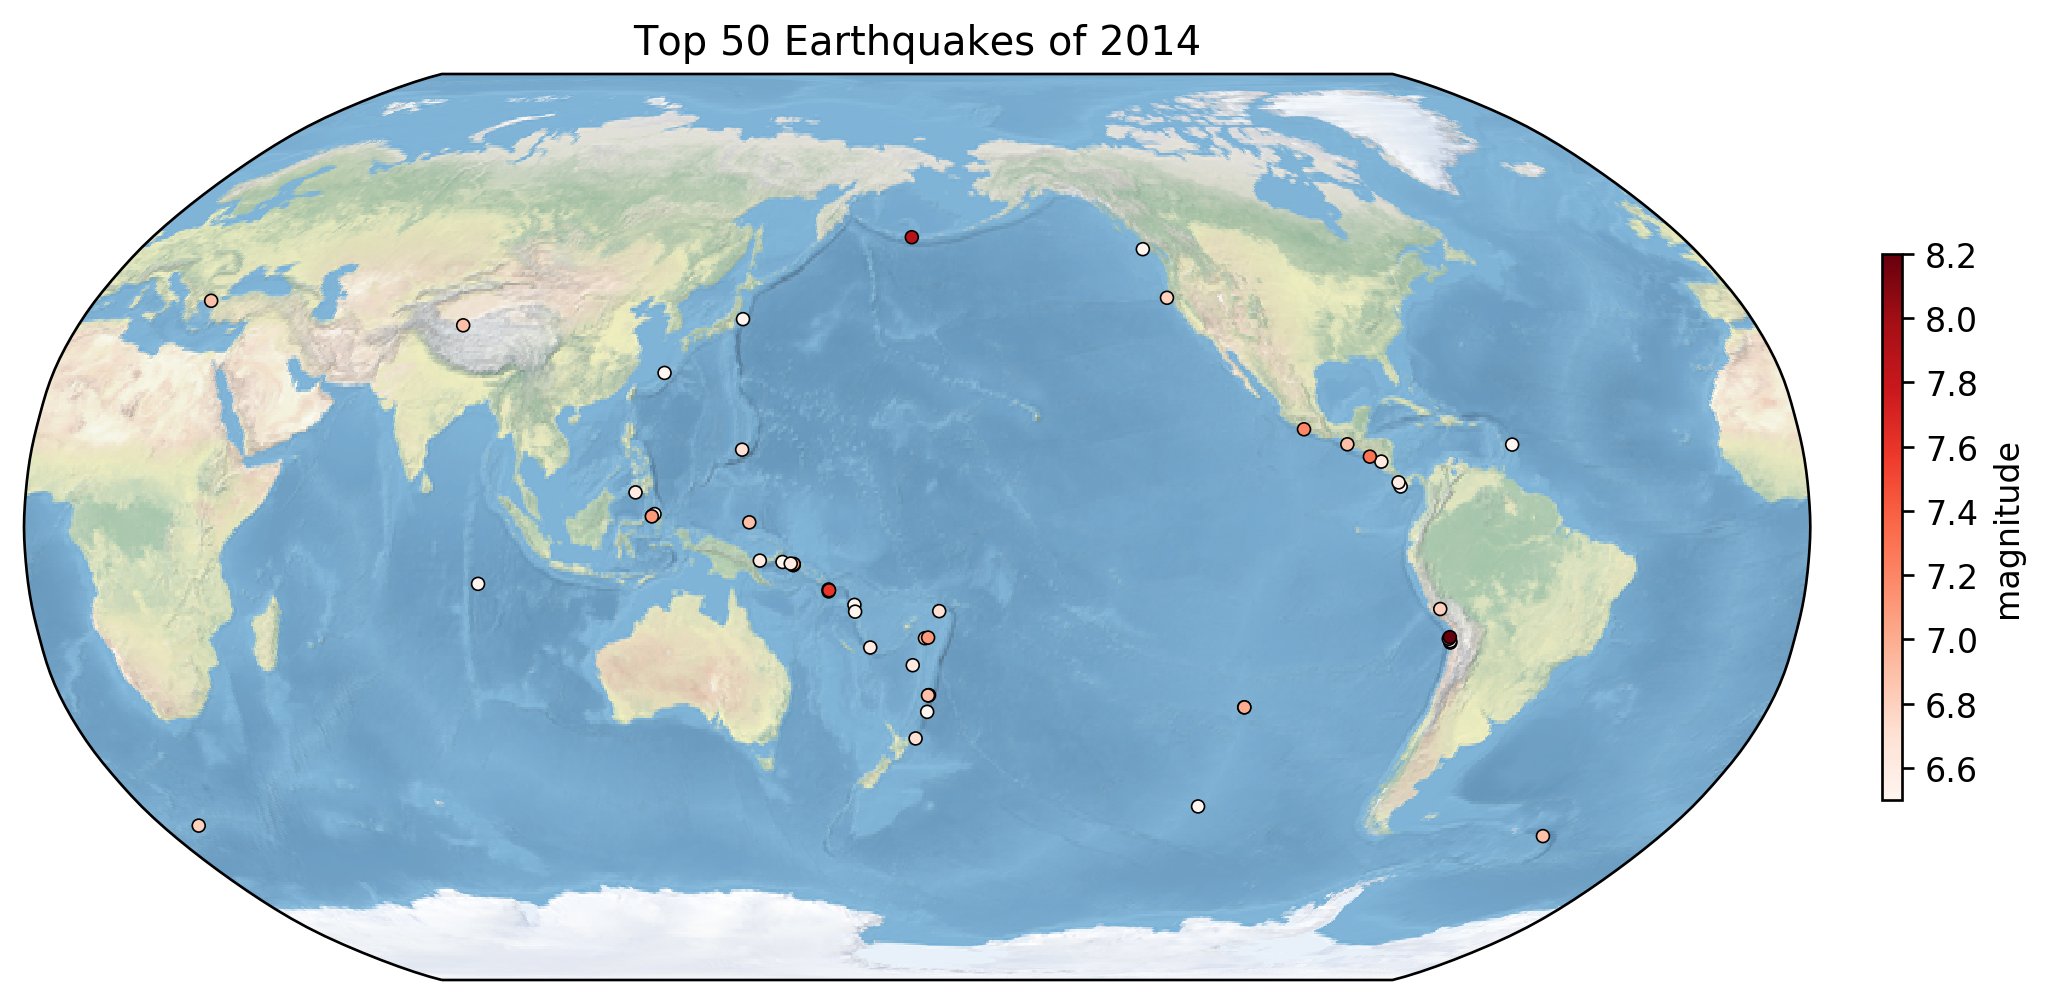

In [8]:
df_eqs=pd.read_csv('usgs_earthquakes.csv')
lon=df_eqs[df_eqs['mag']>=6.5]['longitude'].values
lat=df_eqs[df_eqs['mag']>=6.5]['latitude'].values
mag=df_eqs[df_eqs['mag']>=6.5]['mag'].values

fig = plt.figure(figsize=(10, 5),dpi=240)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.stock_img()
ax.set_title('Top 50 Earthquakes of 2014')
ax.scatter(lon,lat,c=mag ,transform=ccrs.PlateCarree(),vmin=6.5, vmax=8.2, cmap='Reds',
           marker='o',edgecolors='k',s=15, linewidths=0.5)
pos = ax.get_position()
pad = 0.03
width = 0.008
ticks = list(np.linspace(6.6, 8.2, 9))
norm = mpl.colors.Normalize(6.5,8.2)
cax = fig.add_axes([pos.xmax + pad, pos.ymin+0.15, width, (pos.ymax - pos.ymin)-0.3])
cmap=plt.cm.get_cmap('Reds')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,norm=norm,ticks=ticks, orientation='vertical')
cbar.ax.set_ylabel('magnitude')
plt.show()

In [10]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

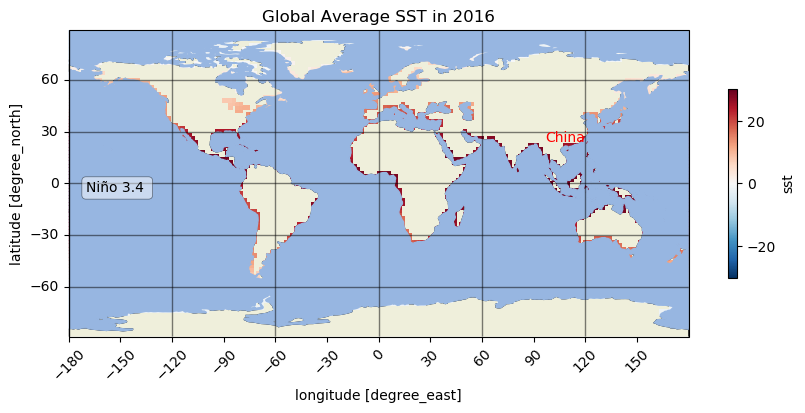

In [12]:
mean_clim = ds.sst.groupby(ds.sst.time.dt.year).mean()

# Create and define the size of the canvas
plt.figure(figsize=(10,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add x label and ticks
plt.xlabel('longitude')
plt.xticks(ticks=np.arange(-180, 180, 30), fontsize=10, rotation=45, ha='center', va='top')
# Add y label and ticks
plt.ylabel('latitude')
plt.yticks(ticks=np.arange(-90, 90, 30), fontsize=10, rotation=0, ha='right', va='center')

#add grid and show the figure
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,color='black',alpha=0.5)
  
# Add LAND and Ocean feature to axes
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=1)

# Plot the SST with colorbar
mean_clim[-1].plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})

# Add figure title
plt.title('Global Average SST in 2016')

# Add anotation 
ax.annotate('Niño 3.4 ',xy=(-170, -5),xytext=(-170, -5),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.5))

# Add text box 
plt.text(108,24,"China",transform=plt.gca().transData, horizontalalignment='center', color='r')
plt.show()

Text(120, 24, 'TaiWan')

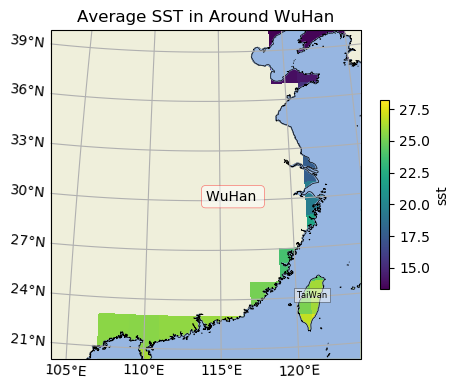

In [13]:
plt.figure(figsize=(5,5), dpi=100)
# Set Orthographic projection style
central_lon, central_lat = 114, 30 # WuHan
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add features
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.coastlines(resolution='10m', linewidth=0.5)

# Add x-axis, y-axis labels and ticks
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# Plot WuHan SST 
WuHan_sst = mean_clim[-1].sel(lat=slice(20, 40), lon=slice(104, 124))
WuHan_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})
# Add anotation 
ax.annotate('WuHan ',xy=(114, 39),xytext=(114,39),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='r',lw=0.5 ,alpha=0.5))
# Add title
plt.title('Average SST in Around WuHan')
# Add text box 
ax.text(120,24,'TaiWan',transform=ccrs.PlateCarree(),fontsize=6,
        bbox=dict(boxstyle='square,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.5))